## Diffusion models

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np

### Kullback-Leibner Divergence

$$
    KL(q(x) || p(x)) = \mathbb{E}_{x\sim q(x)}[\log q(x) - \log p(x)]
$$

KL-divergence from scratch:  177.1358642578125
KL-divergence using pytorch: 208.1927947998047


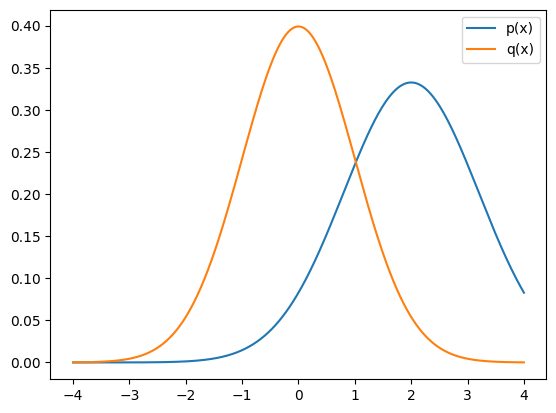

In [62]:
# general formula for a univariate Gaussian
def gaussian(x, mu, sigma):
    return 1/(sigma * (2*torch.pi)**0.5) * torch.exp(-.5 * (x-mu)**2 / sigma**2)

# define a linear range of values between -4 and 4 
x = torch.linspace(-4, 4, 1000)

# define two Gaussians with different parameters
p = gaussian(x, 2, 1.2)
q = gaussian(x, 0, 1)

plt.plot(x, p, label='p(x)')
plt.plot(x, q, label='q(x)')
plt.legend()

# kl(q || p) = sum q(x) (log q(x) - log p(x))
kl = torch.sum(q * (torch.log(q) - torch.log(p)))

# Built-in pytorch function: input is p(x) in log-space and target is q(x)
kl_torch = F.kl_div(torch.log(p), q, reduction='sum')

print(f"KL-divergence from scratch:  {kl}")
print(f"KL-divergence using pytorch: {kl_torch}")

### Fisher Divergence

$$
    \mathbb{E}_{x \sim q(x)}[||\nabla_x \log p(x) - \nabla_x \log q(x)||_2^2]
$$

In [3]:
import torchvision
import torchvision.transforms as transforms

# define preprocessing transformations to dataset
transform = transforms.Compose([
    transforms.Resize(32),
    # transforms.Normalize((0.5,), (0.5,)),
    transforms.ToTensor(),
])

# load training set
train_set = torchvision.datasets.MNIST(root="../datasets", train=True, download=True, transform=transform)

# load test/validation set
test_val_set = torchvision.datasets.MNIST(root="../datasets", train=False, download=True, transform=transform)

# split into separate test and validation sets
X_test_val, y_test_val = zip(*test_val_set)
X_test_val = torch.stack(X_test_val)
y_test_val = torch.tensor(y_test_val)

test_idx, val_idx = torch.utils.data.random_split(y_test_val, [5000, 5000])

X_test = X_test_val[test_idx.indices]
y_test = y_test_val[test_idx.indices]

X_val = X_test_val[val_idx.indices]
y_val = y_test_val[val_idx.indices]

(train_set.data.shape, train_set.targets.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([5000, 1, 32, 32]),
 torch.Size([5000]),
 torch.Size([5000, 1, 32, 32]),
 torch.Size([5000]))

In [ ]:
class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv3d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv3d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv3d(64, 128, 3, padding=1)
        self.conv5 = nn.Conv3d(128, 256, 3, padding=1)